In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

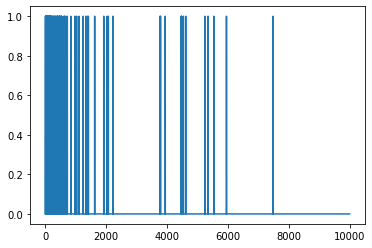

In [3]:
plt.plot(train_data[0])

In [4]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5314 - accuracy: 0.7518 - binary_crossentropy: 0.5314 - val_loss: 0.3767 - val_accuracy: 0.8689 - val_binary_crossentropy: 0.3767
Epoch 2/20
25000/25000 - 2s - loss: 0.2690 - accuracy: 0.9084 - binary_crossentropy: 0.2690 - val_loss: 0.2841 - val_accuracy: 0.8887 - val_binary_crossentropy: 0.2841
Epoch 3/20
25000/25000 - 2s - loss: 0.1849 - accuracy: 0.9351 - binary_crossentropy: 0.1849 - val_loss: 0.2884 - val_accuracy: 0.8859 - val_binary_crossentropy: 0.2884
Epoch 4/20
25000/25000 - 2s - loss: 0.1451 - accuracy: 0.9512 - binary_crossentropy: 0.1451 - val_loss: 0.3130 - val_accuracy: 0.8796 - val_binary_crossentropy: 0.3130
Epoch 5/20
25000/25000 - 2s - loss: 0.1180 - accuracy: 0.9618 - binary_crossentropy: 0.1180 - val_loss: 0.3455 - val_accuracy: 0.8748 - val_binary_crossentropy: 0.3455
Epoch 6/20
25000/25000 - 2s - loss: 0.0982 - accuracy: 0.9690 - binary_crossentropy: 0.0982 - val_loss: 0.3767

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.6182 - accuracy: 0.7706 - binary_crossentropy: 0.6182 - val_loss: 0.5445 - val_accuracy: 0.8324 - val_binary_crossentropy: 0.5445
Epoch 2/20
25000/25000 - 2s - loss: 0.4600 - accuracy: 0.8624 - binary_crossentropy: 0.4600 - val_loss: 0.4226 - val_accuracy: 0.8594 - val_binary_crossentropy: 0.4226
Epoch 3/20
25000/25000 - 2s - loss: 0.3484 - accuracy: 0.8894 - binary_crossentropy: 0.3484 - val_loss: 0.3498 - val_accuracy: 0.8746 - val_binary_crossentropy: 0.3498
Epoch 4/20
25000/25000 - 2s - loss: 0.2805 - accuracy: 0.9078 - binary_crossentropy: 0.2805 - val_loss: 0.3154 - val_accuracy: 0.8801 - val_binary_crossentropy: 0.3154
Epoch 5/20
25000/25000 - 2s - loss: 0.2379 - accuracy: 0.9200 - binary_crossentropy: 0.2379 - val_loss: 0.2945 - val_accuracy: 0.8852 - val_binary_crossentropy: 0.2945
Epoch 6/20
25000/25000 - 2s - loss: 0.2033 - accuracy: 0.9313 - binary_crossentropy: 0.2033 - val_loss: 0.2834

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.3441 - accuracy: 0.8533 - binary_crossentropy: 0.3441 - val_loss: 0.2945 - val_accuracy: 0.8806 - val_binary_crossentropy: 0.2945
Epoch 2/20
25000/25000 - 2s - loss: 0.1397 - accuracy: 0.9491 - binary_crossentropy: 0.1397 - val_loss: 0.3316 - val_accuracy: 0.8734 - val_binary_crossentropy: 0.3316
Epoch 3/20
25000/25000 - 2s - loss: 0.0458 - accuracy: 0.9870 - binary_crossentropy: 0.0458 - val_loss: 0.4697 - val_accuracy: 0.8672 - val_binary_crossentropy: 0.4697
Epoch 4/20
25000/25000 - 2s - loss: 0.0062 - accuracy: 0.9993 - binary_crossentropy: 0.0062 - val_loss: 0.5921 - val_accuracy: 0.8698 - val_binary_crossentropy: 0.5921
Epoch 5/20
25000/25000 - 2s - loss: 0.0011 - accuracy: 0.9999 - binary_crossentropy: 0.0011 - val_loss: 0.6858 - val_accuracy: 0.8686 - val_binary_crossentropy: 0.6858
Epoch 6/20
25000/25000 - 2s - loss: 6.6779e-04 - accuracy: 0.9999 - binary_crossentropy: 6.6779e-04 - val_loss

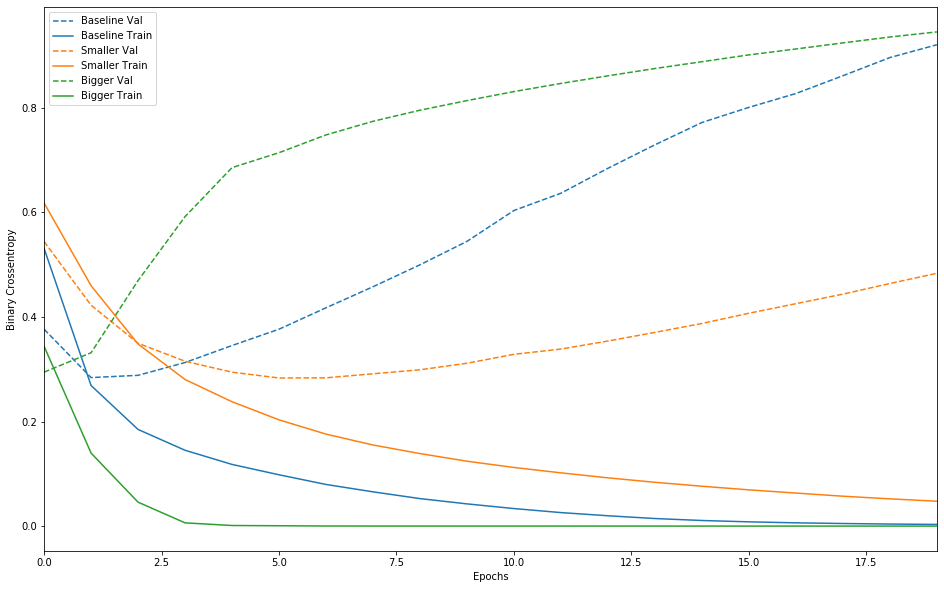

In [10]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [12]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.5066 - accuracy: 0.8092 - binary_crossentropy: 0.4667 - val_loss: 0.3664 - val_accuracy: 0.8812 - val_binary_crossentropy: 0.3268
Epoch 2/20
25000/25000 - 2s - loss: 0.2896 - accuracy: 0.9140 - binary_crossentropy: 0.2472 - val_loss: 0.3299 - val_accuracy: 0.8878 - val_binary_crossentropy: 0.2852
Epoch 3/20
25000/25000 - 2s - loss: 0.2402 - accuracy: 0.9342 - binary_crossentropy: 0.1935 - val_loss: 0.3340 - val_accuracy: 0.8860 - val_binary_crossentropy: 0.2855
Epoch 4/20
25000/25000 - 2s - loss: 0.2168 - accuracy: 0.9434 - binary_crossentropy: 0.1665 - val_loss: 0.3544 - val_accuracy: 0.8790 - val_binary_crossentropy: 0.3028
Epoch 5/20
25000/25000 - 2s - loss: 0.2025 - accuracy: 0.9503 - binary_crossentropy: 0.1496 - val_loss: 0.3618 - val_accuracy: 0.8782 - val_binary_crossentropy: 0.3076
Epoch 6/20
25000/25000 - 2s - loss: 0.1902 - accuracy: 0.9554 - binary_crossentropy: 0.1348 - val_loss: 0.3776

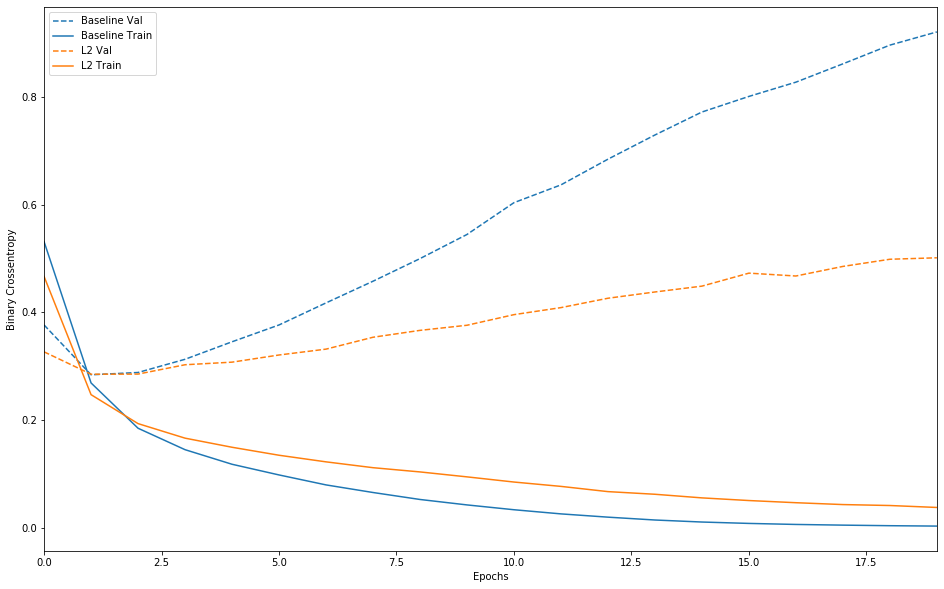

In [14]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [15]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.6477 - accuracy: 0.6210 - binary_crossentropy: 0.6477 - val_loss: 0.5594 - val_accuracy: 0.8425 - val_binary_crossentropy: 0.5594
Epoch 2/20
25000/25000 - 2s - loss: 0.5076 - accuracy: 0.7883 - binary_crossentropy: 0.5076 - val_loss: 0.4128 - val_accuracy: 0.8752 - val_binary_crossentropy: 0.4128
Epoch 3/20
25000/25000 - 2s - loss: 0.4070 - accuracy: 0.8645 - binary_crossentropy: 0.4070 - val_loss: 0.3397 - val_accuracy: 0.8859 - val_binary_crossentropy: 0.3397
Epoch 4/20
25000/25000 - 2s - loss: 0.3442 - accuracy: 0.8970 - binary_crossentropy: 0.3442 - val_loss: 0.3137 - val_accuracy: 0.8871 - val_binary_crossentropy: 0.3137
Epoch 5/20
25000/25000 - 2s - loss: 0.2897 - accuracy: 0.9144 - binary_crossentropy: 0.2897 - val_loss: 0.3016 - val_accuracy: 0.8887 - val_binary_crossentropy: 0.3016
Epoch 6/20
25000/25000 - 2s - loss: 0.2549 - accuracy: 0.9256 - binary_crossentropy: 0.2549 - val_loss: 0.2967

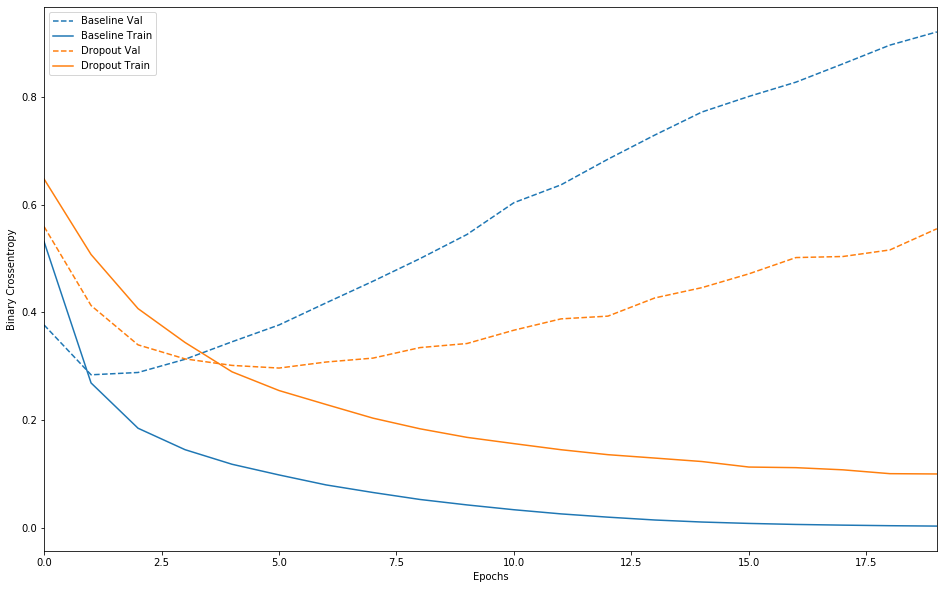

In [16]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])